In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def load_simulation_data(M, T, rho, simJob):
    return np.load("../results-nohist/argon-M-%d-T-%.2f-rho-%.2f-simjob-%d.npz" % (M,T,rho,simJob))

# CV

In [2]:
Ms = [6]
Ts = np.linspace(0.0, 4.0, 17)
rhos = np.concatenate((np.array([0.02, 0.05]), np.linspace(0.1, 2.0, 20)))
simJobs = np.arange(1,6)

In [156]:
cvs = np.zeros((len(Ts), len(rhos), len(simJobs)))

for i in range(0, len(Ts)):
    for j in range(0, len(rhos)):
        for k in range(0, len(simJobs)):
            with load_simulation_data(6, Ts[i], rhos[j], simJobs[k]) as data:
                #data = load_simulation_data(6, Ts[i], rhos[j], simJobs[k])
                cvs[i,j,k] = data["cv"]


In [157]:
data1 = load_simulation_data(6, 0.75, 0.4, 3)
data1["cv"]

array(4.415593249675845)

/Users/jesse/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


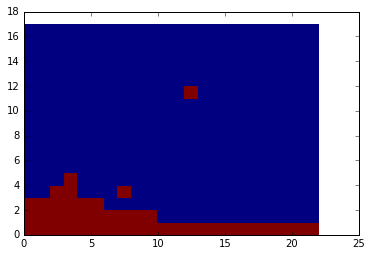

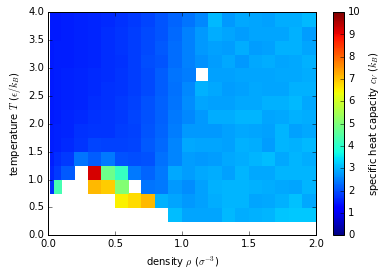

In [191]:
invMask = np.array(np.sum(cvs < 0.0, axis=2) > 0, dtype=bool) 
plt.pcolor(invMask)
plt.figure()

cvs_invdel = np.copy(cvs)

for i in range(0, len(simJobs)):
    cvs_invdel[invMask,i] = np.nan

cvs_nanmean = np.nanmean(cvs_invdel, axis = 2)
cvs_masked = np.ma.masked_where(np.isnan(cvs_nanmean),cvs_nanmean)

plt.pcolor(rhos, Ts, cvs_masked)
plt.clim(0,10)
plt.colorbar(label="specific heat capacity $c_V$ ($k_B$)")
plt.xlabel(r"density $\rho$ ($\sigma^{-3}$)")
plt.ylabel(r"temperature $T$ ($\epsilon / k_B$)")
plt.savefig("cv-colorplot.png", dpi=300)

In [154]:
rhos[13]

1.2

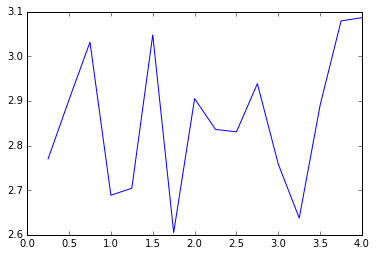

In [155]:
plt.plot(Ts, cvs[:,13,0])

0.4


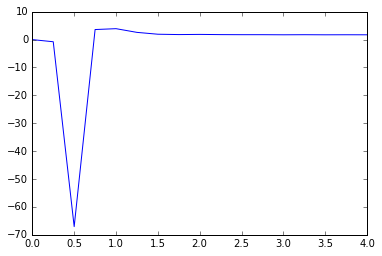

In [8]:
r = 5

print(rhos[r])
plt.plot(Ts, cvs[:,r,4])
plt.figure()

0.4
0.5
[ 31.93477477  -4.346069    -1.96719932  10.76360986 -67.06696669]


(0, 1.5)

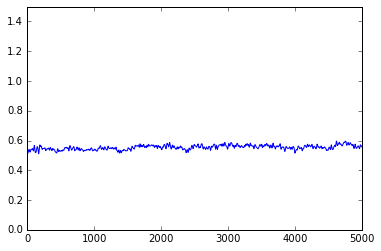

In [9]:
rhoI = r
TI = 2

print(rhos[rhoI])
print(Ts[TI])
print(cvs[TI, rhoI])

plt.plot(load_simulation_data(6, Ts[TI], rhos[rhoI], 1)["temperature"])
plt.ylim([0, 1.5])

In [10]:
linfits = np.zeros((len(Ts), len(rhos), len(simJobs), 2))

for i in range(0, len(Ts)):
    for j in range(0, len(rhos)):
        for k in range(0, len(simJobs)):
            data = load_simulation_data(6, Ts[i], rhos[j], simJobs[k])
            linfits[i,j,k,:] = np.polyfit(np.arange(0,5000) * data["h"], data["temperature"], 1)

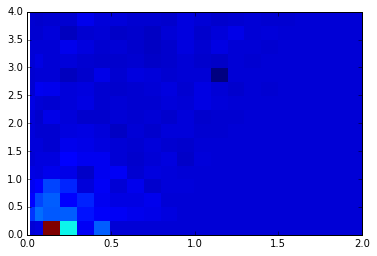

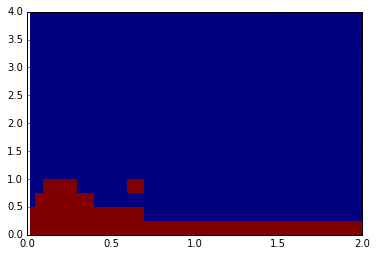

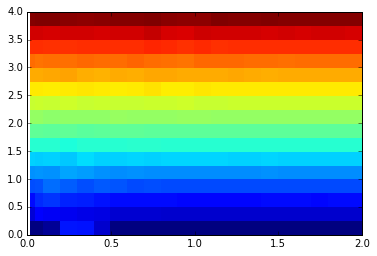

In [14]:
sJ = 3

plt.pcolor(rhos, Ts,linfits[:,:,sJ,0])
plt.figure()
plt.pcolor(rhos, Ts,cvs[:,:,sJ]<0.0)
plt.figure()
plt.pcolor(rhos, Ts,linfits[:,:,sJ,1])

In [15]:
Ps = np.zeros((len(Ts), len(rhos)))

for i in range(0, len(Ts)):
    for j in range(0, len(rhos)):
        data = load_simulation_data(6, Ts[i], rhos[j], 1)
        Ps[i,j] = data["pressure"]

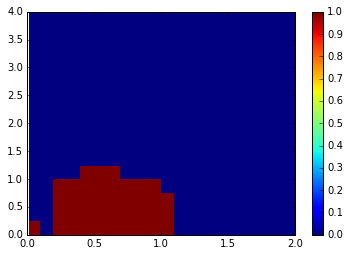

In [134]:
plt.pcolor(rhos, Ts, Ps<0.0)
#plt.clim(0,10)
plt.colorbar()

# Diffusion

1.635632755409457
[  37.39507591 -191.13809496]
2.902593506863722
0.0186219769133


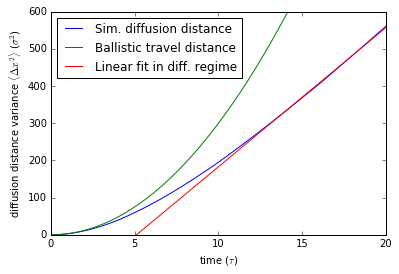

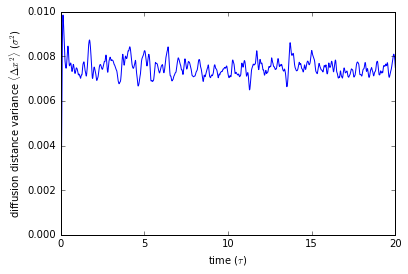

In [190]:
diffData1 = load_simulation_data(6, 1.0, 0.02, 1)
diffDist1 = diffData1["diffusion_distance"]
print(diffData1["cv"])
timeRange = np.arange(0,5000)*diffData1["h"]
vsq = diffData1["diffusion_ballistic_velocitysq"]
plt.plot(timeRange, diffDist1, label="Sim. diffusion distance")
ylims = plt.ylim()
plt.plot(timeRange, timeRange**2 * vsq, label=r"Ballistic travel distance")

D_fit, D_cov = np.polyfit(timeRange[3000:], diffDist1[3000:], 1, cov=True)
diffLin = timeRange * D_fit[0] + D_fit[1]
plt.plot(timeRange, diffLin, label="Linear fit in diff. regime")
plt.ylim(ylims)
plt.legend(loc=2)
plt.xlabel(r"time ($\tau$)")
plt.ylabel(r"diffusion distance variance $\langle \Delta x^2 \rangle$ ($\sigma^2$)")
plt.savefig("diffusion-gas.png", dpi=300)
print(D_fit)

diffData2 = load_simulation_data(6, 0.5, 1.2, 1)
diffDist2 = diffData2["diffusion_distance"]
print(diffData2["cv"])
plt.figure()
plt.plot(timeRange, diffDist2)
plt.xlabel(r"time ($\tau$)")
plt.ylabel(r"diffusion distance variance $\langle \Delta x^2 \rangle$ ($\sigma^2$)")
plt.savefig("diffusion-solid.png", dpi=300)

print(np.sqrt(D_cov[0,0]))


In [223]:
Ds = np.zeros((len(Ts), len(rhos)))

for i in range(0, len(Ts)):
    for j in range(0, len(rhos)):
        data = load_simulation_data(6, Ts[i], rhos[j], 1)
        Ds[i,j] = np.polyfit(np.arange(0,2000) * data["h"], data["diffusion_distance"][3000:], 1)[0]
        
Ds[4,0]

37.395075910456647

In [220]:
Ds

1.0

/Users/jesse/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


/Users/jesse/anaconda/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


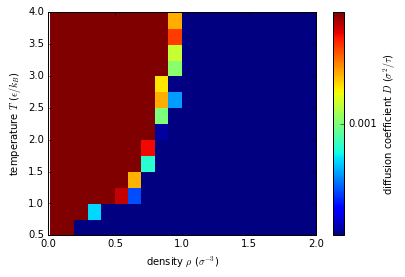

In [218]:
plt.pcolor(rhos, Ts[2:], np.log10(Ds[2:,:]))
cbar = plt.colorbar(label=r"diffusion coefficient $D$ ($\sigma ^{2} / \tau$)")
cbar.set_ticks([-3, -2, -1, 0, 1, 2, 3, 4])
cbar.set_ticklabels(np.power(10, [-3.0, -2.0, -1.0, 0, 1, 2, 3, 4]))
plt.xlabel(r"density $\rho$ ($\sigma ^{-3}$)")
plt.ylabel(r"temperature $T$ ($\epsilon / k_B$)")
#plt.savefig("diffusion-colorplot.png", dpi=300)

0.7
0.8
0.9
1.0
1.1
1.2


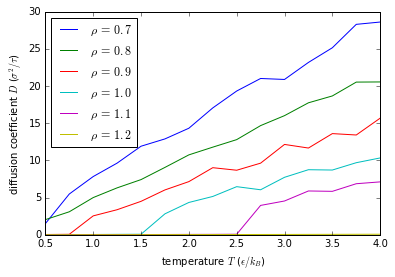

In [93]:
r = 8
for r in range(8,14):
    print(rhos[r])
    plt.plot(Ts[2:], Ds[2:,r], label=r"$\rho\, =\, " + str(rhos[r]) + "$")
plt.legend(loc=2)
plt.xlabel(r"temperature $T$ ($\epsilon / k_B$)")
plt.ylabel(r"diffusion coefficient $D$ ($\sigma^{2} / \tau$)")
plt.savefig("diffusion-coefficients-rhos.png", dpi=300)

# Correlation function

In [102]:
gasData = load_simulation_data(6, 3.0, 0.3, 1)
liqData = load_simulation_data(6, 1.0, 0.8, 1)
solData = load_simulation_data(6, 0.5, 1.2, 1)

In [116]:
print(gasData.keys())
Lgas = np.power(gasData["n"]/gasData["rho"], 1/3)
Lliq = np.power(liqData["n"]/liqData["rho"], 1/3)
Lsol = np.power(solData["n"]/solData["rho"], 1/3)
print(Lgas)
print(Lliq)
print(Lsol)

['rho', 'equilibrationTime', 'simulationTime', 'potential_energy', 'cv', 'diffusion_ballistic_velocitysq', 'distHistBinSize', 'temperature', 'kinetic_energy', 'diffusion_distance', 'h', 'desiredT', 'distHistBins', 'pressure', 'virial', 'M', 'n', 'correlation_function']
14.227573218
10.2598556801
8.96280949311


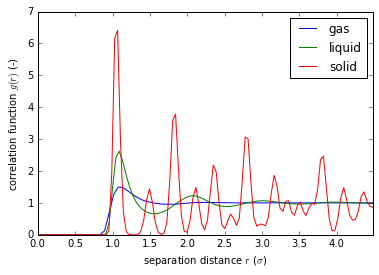

In [120]:
plt.plot(gasData["correlation_function"][0], gasData["correlation_function"][1], label="gas")
plt.plot(liqData["correlation_function"][0], liqData["correlation_function"][1], label="liquid")
plt.plot(solData["correlation_function"][0], solData["correlation_function"][1], label="solid")
plt.xlim(0,Lsol/2)

plt.xlabel("separation distance $r$ ($\sigma$)")
plt.ylabel("correlation function $g(r)$ (-)")
plt.legend()

plt.savefig("correlation-function.png", dpi=300)

In [113]:
np.max(gasData["correlation_function"][0])/2

6.1453181206771479

# Pressure

In [202]:
press = np.zeros((len(Ts), len(rhos), len(simJobs)))

for i in range(0, len(Ts)):
    for j in range(0, len(rhos)):
        for k in range(0, len(simJobs)):
            with load_simulation_data(6, Ts[i], rhos[j], simJobs[k]) as data:
                #data = load_simulation_data(6, Ts[i], rhos[j], simJobs[k])
                press[i,j,k] = data["pressure"] * data["rho"] * np.mean(data["temperature"])
                


605.894752957


/Users/jesse/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/jesse/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:824: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)


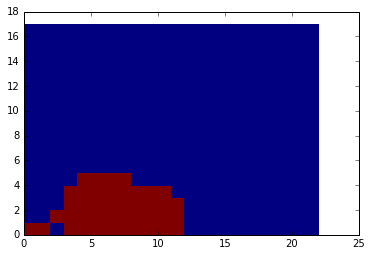

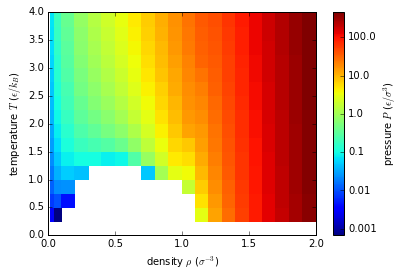

In [216]:
invMaskPress = np.array(np.sum(press < 0.0, axis=2) > 0, dtype=bool) 
plt.pcolor(invMaskPress)
plt.figure()

ps_invdel = np.copy(press)

for i in range(0, len(simJobs)):
    ps_invdel[invMaskPress,i] = np.nan

ps_nanmean = np.nanmean(ps_invdel, axis = 2)
ps_masked = np.ma.masked_where(np.isnan(ps_nanmean),ps_nanmean)

print(np.max(ps_masked))

plt.pcolor(rhos, Ts[1:], np.log10(ps_masked[1:]))
cbar = plt.colorbar(label=r"pressure $P$ ($\epsilon / \sigma ^{3}$)")
cbar.set_ticks([-3, -2, -1, 0, 1, 2, 3])
cbar.set_ticklabels(np.power(10, [-3.0, -2.0, -1.0, 0, 1, 2, 3]))
plt.xlabel(r"density $\rho$ ($\sigma ^{-3}$)")
plt.ylabel(r"temperature $T$ ($\epsilon / k_B$)")
plt.savefig("pressure-colorplot.png")